# Feature explanatory data analysis

In [1]:
import sys
sys.path.append('../../')
from feature.selection import load_td_feat, load_fd_feat

SOURCES = [load_td_feat, load_fd_feat]
AXIS_SELECT = (['az'], ['ax', 'ay', 'az'])


# Options: (0,0), (0, 1), (1, 0), (1, 1)
SOURCE = SOURCES[0]
AXIS = AXIS_SELECT[1]

In [2]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, f_classif

from feature.selection import corr_classif
from feature.models import (
    fault_labeling,
    pipeline_v1,
    cross_cuts_3d,
    cross_cuts_3d_anomalies
)


FEATURES_PATH =  '../../datasets/features_data/'
FAULT_CLASSES = {'normal': 'N', 'imbalance': 'I', 'horizontal-misalignment': 'HM', 'vertical-misalignment': 'VM'}

## Features from one sensor position: (ax, ay, az)

In [3]:
features = fault_labeling(SOURCE(AXIS, path=FEATURES_PATH), FAULT_CLASSES)
features.head(5)

,fault,severity,seq,rpm,ax_mean,ax_std,ax_skew,ax_kurt,ax_rms,ax_pp,...,az_kurt,az_rms,az_pp,az_crest,az_margin,az_shape,az_max,severity_class,severity_level,anomaly
0,HM,0.5,0,2630.234831,0.020724,0.582707,-0.338251,-0.338251,0.583075,4.4821,...,0.032696,0.291176,2.7311,4.813586,7.345990,1.278519,1.4016,0.0,0.0,False
1,HM,0.5,1,2630.234831,0.015439,0.584576,-0.333051,-0.333051,0.584780,4.7189,...,0.000249,0.296124,4.3445,7.639033,11.797865,1.290500,2.2621,0.0,0.0,False
2,HM,0.5,2,2630.234831,0.016864,0.586870,-0.339971,-0.339971,0.587112,4.2815,...,-0.010208,0.291989,3.5761,6.331396,9.659169,1.279184,1.7274,0.0,0.0,False
3,HM,0.5,3,2630.234831,0.017363,0.581708,-0.330890,-0.330890,0.581967,4.3166,...,-0.007102,0.287781,2.8656,5.256074,7.993833,1.276577,1.3530,0.0,0.0,False
4,HM,0.5,4,2630.234831,0.016283,0.585545,-0.349453,-0.349453,0.585771,4.4166,...,-0.060711,0.294727,2.8805,5.138314,7.916799,1.287480,1.3661,0.0,0.0,False


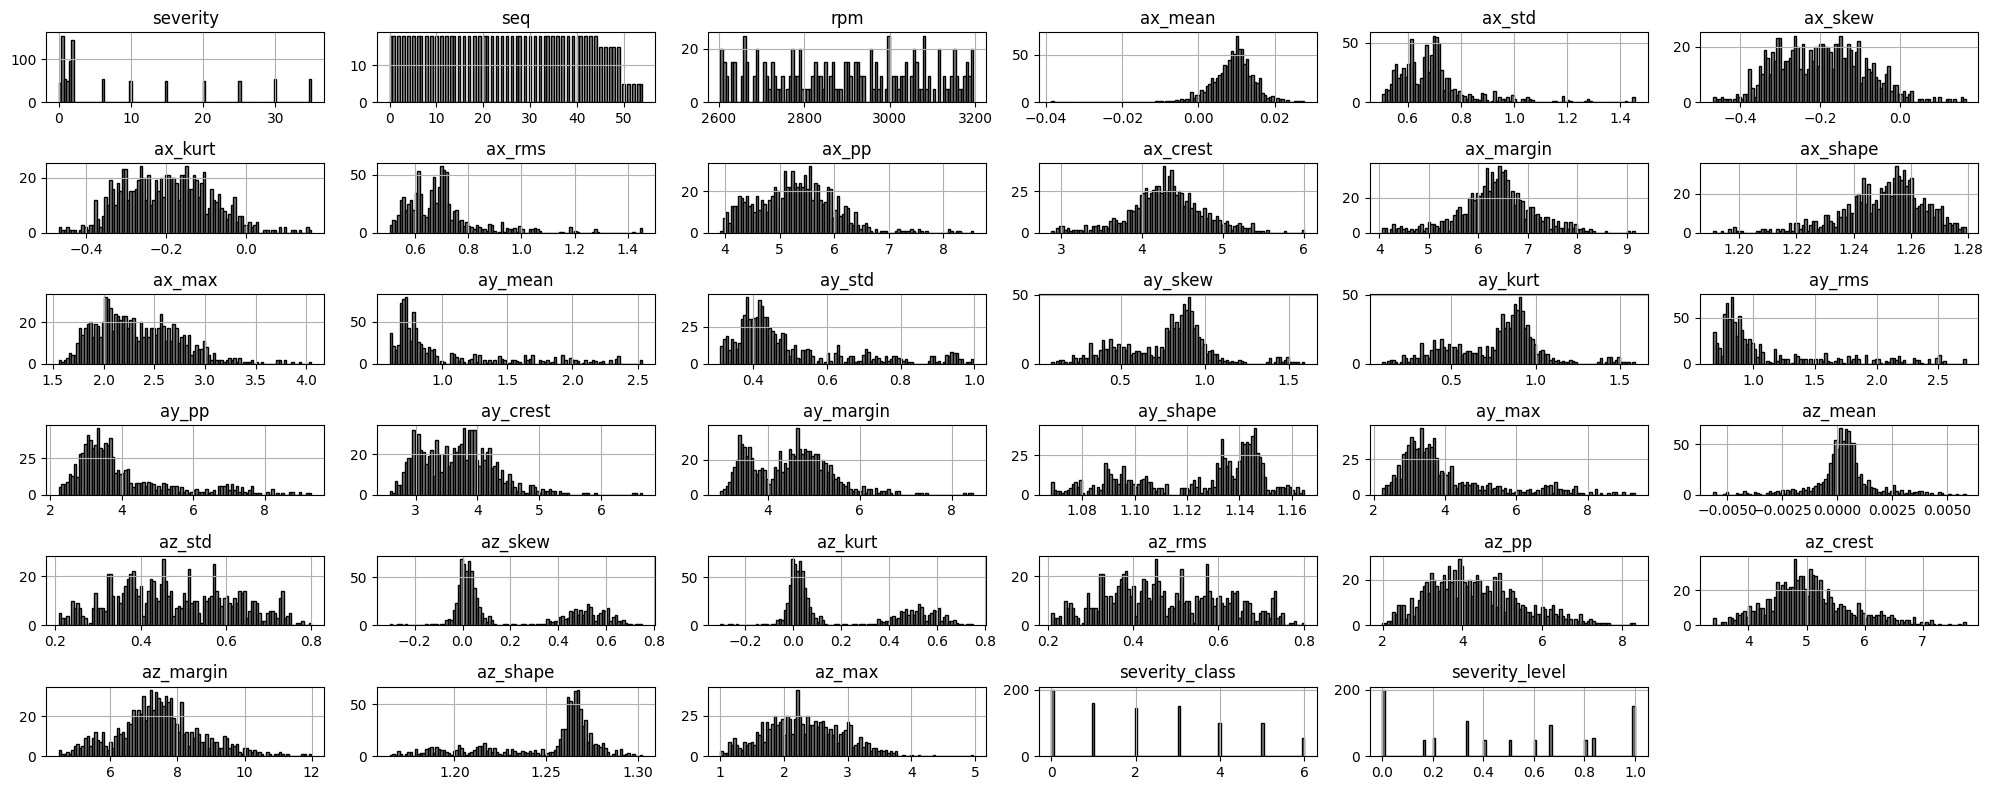

In [4]:
features.hist(bins=100, figsize=(20, 8), color='grey', ec='black')
plt.tight_layout()
plt.show()

### C
Feature subsets for multiclass classification

In [5]:
for k in range(1, min(len(features.columns) + 1, 10)):
    r = pipeline_v1(features, 0.6, k, corr_classif, multiclass=True)
    print(k, list(r[0].columns))

1 ['az_skew']
2 ['ay_shape', 'az_skew']
3 ['ay_shape', 'az_skew', 'az_shape']
4 ['ay_mean', 'ay_shape', 'az_skew', 'az_shape']
5 ['ay_mean', 'ay_skew', 'ay_shape', 'az_skew', 'az_shape']
6 ['ay_mean', 'ay_skew', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']
7 ['ay_mean', 'ay_skew', 'ay_crest', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']
8 ['ay_mean', 'ay_skew', 'ay_pp', 'ay_crest', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']
9 ['ax_shape', 'ay_mean', 'ay_skew', 'ay_pp', 'ay_crest', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']


### C
Feature selection with correlation

In [6]:
X_train, X_test, y_train, y_test = pipeline_v1(features, func_select=corr_classif, train=0.6, nfeat=3)

print()
X_train.info()
X_train.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 306 to 810
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ay_shape  546 non-null    float64
 1   az_skew   546 non-null    float64
 2   az_shape  546 non-null    float64
dtypes: float64(3)
memory usage: 17.1 KB


,ay_shape,az_skew,az_shape
306,0.246715,0.852751,0.274243
309,0.240383,0.881364,0.274193
400,0.189561,0.735816,0.076823
44,0.686059,0.217591,0.899683
578,0.660110,0.354514,0.767693


### C
Statistical distribution of features in training set

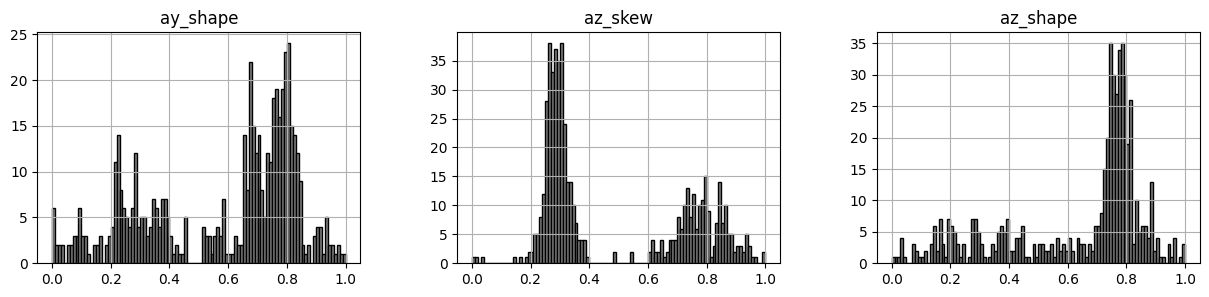

In [7]:
X_train.hist(bins=100, figsize=(15, 3), layout=(1, 3), color='grey', ec='black')
plt.show()

### C
Cross sectional plots in pairs of axis

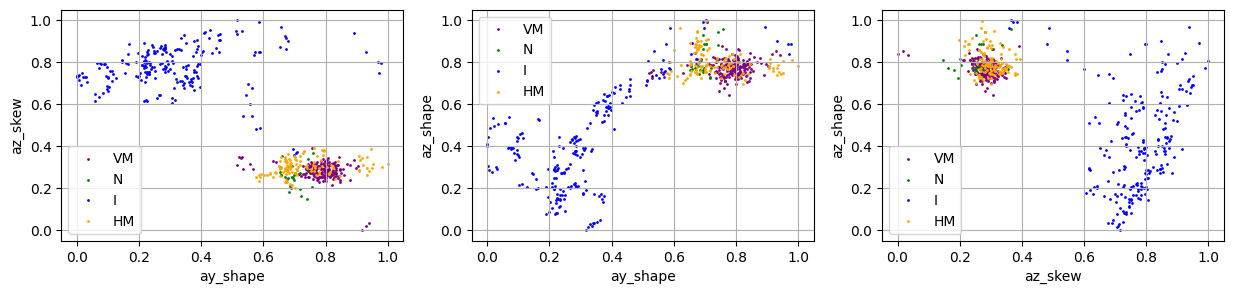

In [8]:
cross_cuts_3d(X_train, y_train)
plt.show()

### F
Feature subsets for multiclass classification

In [9]:
for k in range(1, min(len(features.columns) + 1, 10)):
    r = pipeline_v1(features, 0.6, k, f_classif, multiclass=True, anomaly_ratio=0.1)
    print(k, list(r[0].columns))

1 ['az_skew']
2 ['ay_shape', 'az_skew']
3 ['ay_shape', 'az_skew', 'az_shape']
4 ['ay_mean', 'ay_shape', 'az_skew', 'az_shape']
5 ['ay_mean', 'ay_skew', 'ay_shape', 'az_skew', 'az_shape']
6 ['ay_mean', 'ay_skew', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']
7 ['ay_mean', 'ay_skew', 'ay_crest', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']
8 ['ax_shape', 'ay_mean', 'ay_skew', 'ay_crest', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']
9 ['ax_shape', 'ay_mean', 'ay_skew', 'ay_pp', 'ay_crest', 'ay_shape', 'az_skew', 'az_pp', 'az_shape']


### F
Feature subsets for binary classification (anomaly)

In [10]:
for k in range(1, min(len(features.columns) + 1, 10)):
    r = pipeline_v1(features, 0.6, k, f_classif, multiclass=False, anomaly_ratio=0.1)
    print(k, list(r[0].columns))

1 ['az_std']
2 ['ay_pp', 'az_std']
3 ['ax_std', 'ay_pp', 'az_std']
4 ['ax_std', 'ax_pp', 'ay_pp', 'az_std']
5 ['ax_std', 'ax_pp', 'ax_max', 'ay_pp', 'az_std']
6 ['ax_std', 'ax_pp', 'ax_max', 'ay_mean', 'ay_pp', 'az_std']
7 ['ax_std', 'ax_pp', 'ax_max', 'ay_mean', 'ay_pp', 'az_std', 'az_max']
8 ['ax_std', 'ax_pp', 'ax_max', 'ay_mean', 'ay_pp', 'az_std', 'az_pp', 'az_max']
9 ['ax_std', 'ax_pp', 'ax_max', 'ay_mean', 'ay_pp', 'az_std', 'az_pp', 'az_shape', 'az_max']


### F
Feature selection with F statistic

In [11]:
X_train, X_test, y_train, y_test = pipeline_v1(features, func_select=f_classif, train=0.6, nfeat=3)

print()
X_train.info()
X_train.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 306 to 810
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ay_shape  546 non-null    float64
 1   az_skew   546 non-null    float64
 2   az_shape  546 non-null    float64
dtypes: float64(3)
memory usage: 17.1 KB


,ay_shape,az_skew,az_shape
306,0.246715,0.852751,0.274243
309,0.240383,0.881364,0.274193
400,0.189561,0.735816,0.076823
44,0.686059,0.217591,0.899683
578,0.660110,0.354514,0.767693


### F

Statistical distribution of features in training set

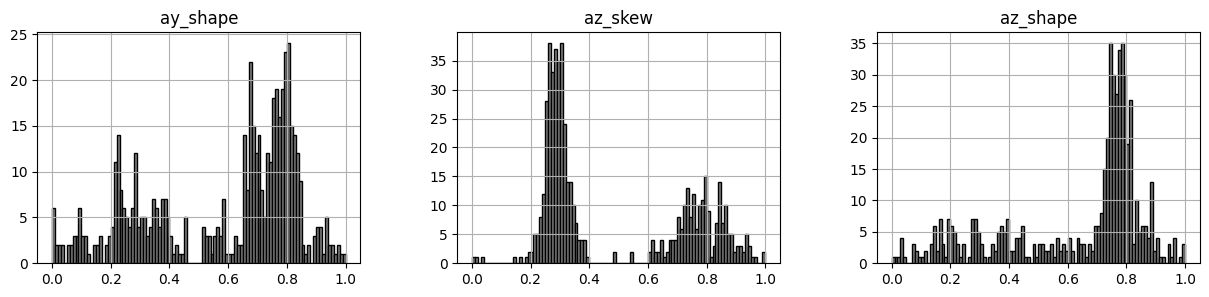

In [12]:
X_train.hist(bins=100, figsize=(15, 3), layout=(1, 3), color='grey', ec='black')
plt.show()

### F
Cross sectional plots in pairs of axis

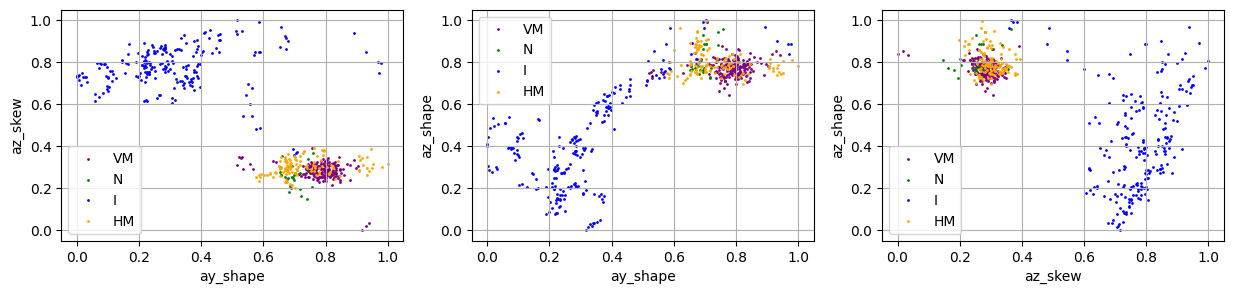

In [13]:
cross_cuts_3d(X_train, y_train)
plt.show()

### F
Feature subsets for multiclass classification

In [14]:
for k in range(1, min(len(features.columns) + 1, 10)):
    r = pipeline_v1(features, 0.6, k, mutual_info_classif, multiclass=True, anomaly_ratio=0.1)
    print(k, list(r[0].columns))

1 ['ay_mean']
2 ['ay_mean', 'az_skew']
3 ['ay_mean', 'ay_shape', 'az_skew']
4 ['ay_mean', 'ay_skew', 'ay_shape', 'az_skew']
5 ['ay_mean', 'ay_skew', 'ay_shape', 'az_skew', 'az_shape']
6 ['ay_mean', 'ay_skew', 'ay_shape', 'az_std', 'az_skew', 'az_shape']
7 ['ax_std', 'ay_mean', 'ay_skew', 'ay_shape', 'az_std', 'az_skew', 'az_shape']
8 ['ax_std', 'ay_mean', 'ay_skew', 'ay_crest', 'ay_shape', 'az_std', 'az_skew', 'az_shape']
9 ['ax_std', 'ay_mean', 'ay_skew', 'ay_crest', 'ay_shape', 'az_std', 'az_skew', 'az_pp', 'az_shape']


### F
Feature subsets for binary classification (anomaly)

In [15]:
for k in range(1, min(len(features.columns) + 1, 10)):
    r = pipeline_v1(features, 0.6, k, mutual_info_classif, multiclass=False, anomaly_ratio=0.1)
    print(k, list(r[0].columns))

1 ['az_std']
2 ['ay_mean', 'az_std']
3 ['ax_shape', 'ay_mean', 'az_std']
4 ['ax_pp', 'ax_shape', 'ay_mean', 'az_std']
5 ['ax_std', 'ax_pp', 'ax_shape', 'ay_mean', 'az_std']
6 ['ax_std', 'ax_pp', 'ax_shape', 'ay_mean', 'ay_pp', 'az_std']
7 ['ax_std', 'ax_pp', 'ax_shape', 'ay_mean', 'ay_pp', 'az_std', 'az_max']
8 ['ax_std', 'ax_pp', 'ax_shape', 'ay_mean', 'ay_pp', 'az_std', 'az_skew', 'az_max']
9 ['ax_std', 'ax_pp', 'ax_crest', 'ax_shape', 'ay_mean', 'ay_pp', 'az_std', 'az_skew', 'az_max']


### MI
Feature selection with Mutual information

In [16]:
X_train, X_test, y_train, y_test = pipeline_v1(features, func_select=mutual_info_classif, train=0.6, nfeat=3)

print()
X_train.info()
X_train.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 306 to 810
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ay_mean   546 non-null    float64
 1   ay_shape  546 non-null    float64
 2   az_skew   546 non-null    float64
dtypes: float64(3)
memory usage: 17.1 KB


,ay_mean,ay_shape,az_skew
306,0.328987,0.246715,0.852751
309,0.333205,0.240383,0.881364
400,0.536199,0.189561,0.735816
44,0.021401,0.686059,0.217591
578,0.106206,0.660110,0.354514


### MI
Statistical distribution of features in training set

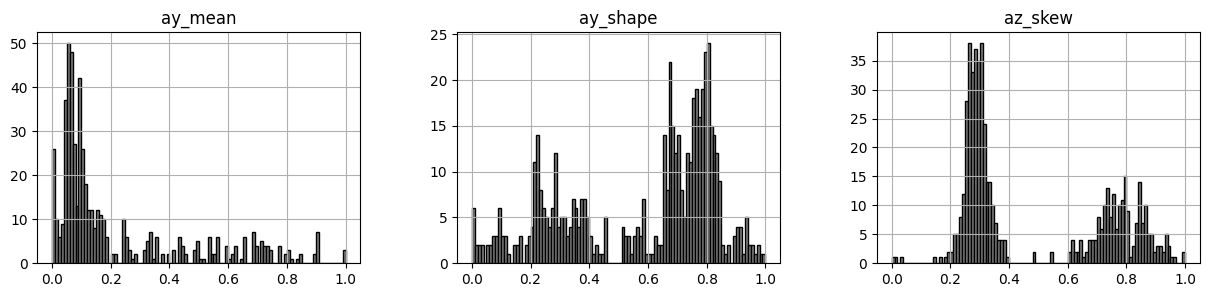

In [17]:
X_train.hist(bins=100, figsize=(15, 3), layout=(1, 3), color='grey', ec='black')
plt.show()

### MI
Cross sectional plots in pairs of axis

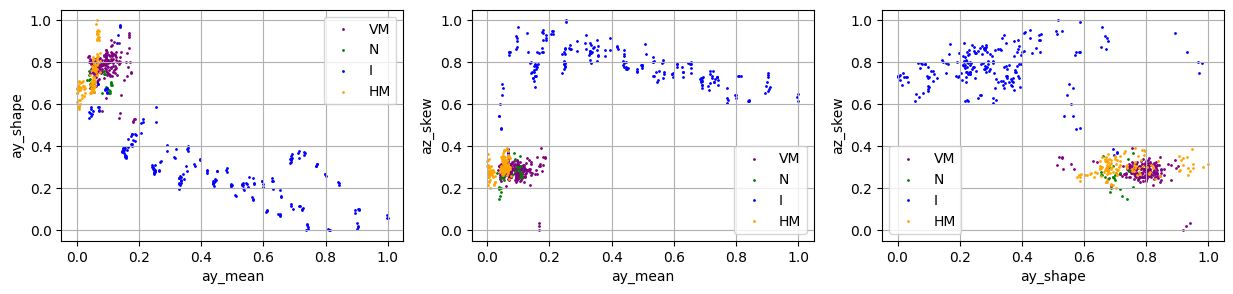

In [18]:
cross_cuts_3d(X_train, y_train)
plt.show()

### MI

3D distribution of data points

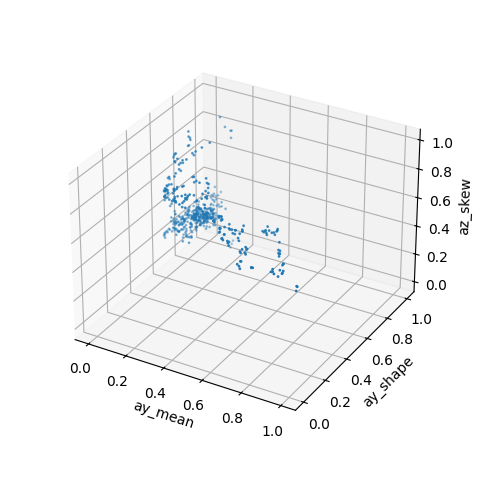

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    X_train.loc[:,X_train.columns[0]],
    X_train.loc[:,X_train.columns[1]],
    X_train.loc[:,X_train.columns[2]],
    s=1
)
ax.set_box_aspect(aspect=None, zoom=0.85)
ax.set_xlabel(X_train.columns[0])
ax.set_ylabel(X_train.columns[1])
ax.set_zlabel(X_train.columns[2])
plt.show()

### MI
Cross sectional plots of anomalies

Percentage of anomalies: 28.02 %


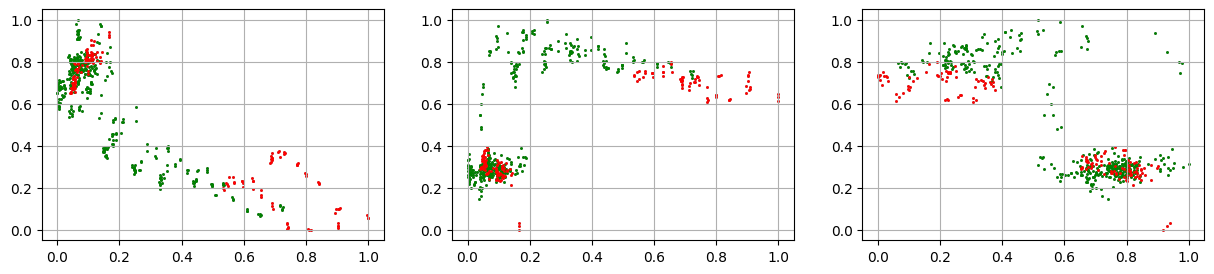

In [20]:
X_train, X_test, y_train, y_test = pipeline_v1(features, train=0.6, nfeat=3, multiclass=True, func_select=mutual_info_classif)
cross_cuts_3d_anomalies(X_train, features['anomaly'].iloc[list(X_train.index)])

percentage = len(features[features['anomaly'] == True]) / len(features)
print(f'Percentage of anomalies: {percentage * 100:.2f} %')